<a href="https://colab.research.google.com/github/SERVIR/flood_mapping_intercomparison/blob/main/Module_4_Product_Access.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prerequisites**

Before taking this module, you must have the following

* A Google Earth Engine Account
* A Google Cloud Project tied to your Google Earth Engine account.
* Google Colaboratory installed on your Google Drive

# **Introduction**
In this module, we will obtain some open source flood products and upload them to Google Earth Engine. We will be grabbing the following flood products:
1. MCDWD -- MODIS Combined Water Detection Product (NRT MODIS/Aqua+Terra Global Flood Product MCDWD_L3_NRT, Slayback et al 2023)
2. VIIRS Flood Mapping Product -- (Li et al 2017)
3. Copernicus Global Flood Monitor  (Salamon et al 2021)
4. DSWX-HLS -- Observational Products for End User Analysis Dynamic Surface Water Extent (DSWx) from the Harmonized Landsat-Sentinel (HLS) Satellite Data. (OPERA 2023)

This document contains a brief summary of each product. For a more detailed look at the characteristics of each dataset, click [this link](https://docs.google.com/spreadsheets/d/15igmiH1EHjtiyprgx6LnF78lvNh2scZSnlc12ySr0PQ/edit?usp=sharing) to view a spreadhseet with more details.

Before we download the products, let's prepare a folder in Google Earth Engine where we can upload the flood products.

- Step 1: Open the [Google Earth Engine Code Editor](https://code.earthengine.google.com/)

- Step 2: Navigate to the Assets Tab in the upper right.

- Step 3: Create a new folder by clicking the "New Button". Enter in a name or path for the folder. **This will be our parent folder, and will be where we upload all of the flood products**. My parent folder is called "users/mickymags/flood_intercomparison", but you can call yours whatever you like.
- Step 4: Create a folder in which to hold each of the flood products within the parent folder by clicking the "New" button, and creating a folder within the parent folder called "mcdwd", "vfm", "dswx", and "gfm" respectively. When you are done, your assets folder should look similar to the bottom of the picture below.



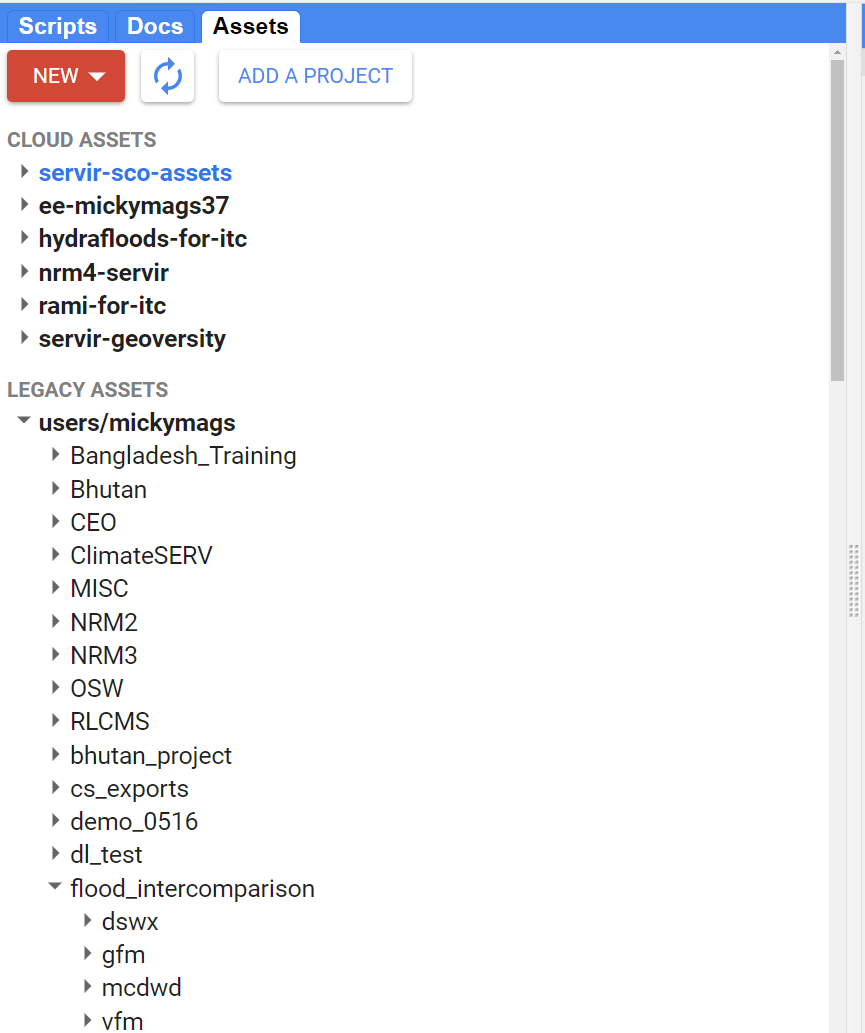



- Step 5: Run the code below to import some packages we will use later.

### MODIFIABLE VARIABLE ALERT

In [ ]:
my_project = 'servir-sco-assets'
my_Gdrive_folder = '/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26'

If you do not yet have gdal installed on Google Colab you will have to uncomment the following cell by deleting the first and list lines.

Thank you and credit to Dr. Chanin Nantasenamat and his "Data Professor" Youtube Channel for the above code: [https://github.com/dataprofessor](https://github.com/dataprofessor)

In [ ]:
'''
################################################################################
# INSTALL CONDA ON GOOGLE COLAB
################################################################################
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

!conda install -c conda-forge gdal

'''

"\n################################################################################\n# INSTALL CONDA ON GOOGLE COLAB\n################################################################################\n! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh\n! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh\n! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local\nimport sys\nsys.path.append('/usr/local/lib/python3.7/site-packages/')\n\n!conda install -c conda-forge gdal\n\n"

In [ ]:
# Import packages
from google.colab import drive
from osgeo import gdal
import os
import ee
import subprocess
import glob

ee.Authenticate()
ee.Initialize(project = my_project)

In [ ]:
drive.mount('/content/drive/')#, force_remount=True)

Mounted at /content/drive/


In [ ]:
cd drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26

/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26


In [ ]:
os.mkdir('MCDWD')
os.mkdir('DSWX_HLS')
os.mkdir('DSWX_S1')
os.mkdir('VFM')
os.mkdir('GFM')

FileExistsError: [Errno 17] File exists: 'MCDWD'

In [ ]:
ls

'Copy of Module_2_HydroSAR_Chad_09_26'
'Copy of Module_3_HYDRAFloods_Chad_09_26'
'Copy of Module_5_Harmonization_And_Visualization_Chad_09_26'
 dswx_hls/
 DSWX_HLS/
 dswx_s1/
 DSWX_S1/
 GFM/
 hydrosar/
 mcdwd/
 MCDWD/
 Module_1_Data_Availability_Chad_09_26
 Module_4a_Product_Access_and_reprojection_chad_09_26
 Module_4_Product_Access_chad_09_26
 Module_6a_Gridded_Sampling_Design_Chad_09_26
 Module_6_Sampling_Design_Chad_09_26
 VFM/


- Step 6: Follow the instructions below to download each of the flood products and upload them to our parent folder. If you only want to download some of the products, you can use the table of contents towards the upper left to jump to a specific session.

## DSWx-HLS Product Summary

### DSWx-HLS Characteristics  
- Spatial Extent:
- Spatial Resolution:
- Temporal Extent
- Temporal Resolution: Daily
- Latency:
- Subproducts

### DSWx-HLS Data Access and Download

- Step 1: Click [here](https://search.earthdata.nasa.gov/search/granules?p=C2617126679-POCLOUD&pg[0][v]=f&tl=1738951207.111!3!!) to visit the Earthdata site.
- Step 2: Upload the GEOJSON file you downloaded from google drive at the end of module 1.
- Step 3: Type in the date of interest for both the start and end date.
- Step 4: Click the download all button
- Step 5: Downnload the "Earthdata Download app" when prompted
- Step 6: Upload all the files ending in "B02_BWTR.tif" to Google Drive

In [ ]:
pwd

'/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26'

In [ ]:
cd DSWX_HLS

/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26/DSWX_HLS


Let's list all of the files in this directory now

In [ ]:
pwd

'/content/drive/My Drive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26/MCDWD'

In [ ]:
ls

dswx_hls_01.tif  dswx_hls_08.tif  dswx_hls_15.tif     dswx_hls_22.tif
dswx_hls_02.tif  dswx_hls_09.tif  dswx_hls_16tif.tif  dswx_hls_23.tif
dswx_hls_03.tif  dswx_hls_10.tif  dswx_hls_17.tif     dswx_hls_24.tif
dswx_hls_04.tif  dswx_hls_11.tif  dswx_hls_18.tif     dswx_hls_25.tif
dswx_hls_05.tif  dswx_hls_12.tif  dswx_hls_19.tif     dswx_hls_26.tif
dswx_hls_06.tif  dswx_hls_13.tif  dswx_hls_20.tif     dswx_hls_27.tif
dswx_hls_07.tif  dswx_hls_14.tif  dswx_hls_21.tif     merged_dswx_hls_chad_09_26.tif


Look at the file names above. We can see that they all start with "OPERA_L3_DSWx-HLS". But after this we can see that some of the file names differ. The ones at the top of the list have "T33..." whereas the ones at the bottom of the list have "T34...". This code corresponds to the UTM (Universal Transverse Mercator) zone that each of the tiff files fall in. If files fall into different zones, they will have different projections. In this case, there are less tiles that fall into zone 34 than zone 33, so we will reproject all of these to be in zone 33.

to prove to you that this code correlates to the UTM zone, let's grab the first file and check its projection. The following output will print a lot of information, but one of the first things printed is 'PROJCRS["WGS 84 / UTM zone XYZ]'. In this case, "XYZ  is 33N. The UTM coordinate system has an EPSG code of 326XX where XX = the zone we are in. if we scroll down we can see that UTM Zone 33N correlates to the EPSG code of 32633.

In [ ]:
first_dswx = 'OPERA_L3_DSWx-HLS_T33NYJ_20240926T090731Z_20241001T125559Z_S2A_30_v1.0_B02_BWTR.tif'
first_info = gdal.Info(first_dswx)
print(first_info)

Driver: GTiff/GeoTIFF
Files: OPERA_L3_DSWx-HLS_T33NYJ_20240926T090731Z_20241001T125559Z_S2A_30_v1.0_B02_BWTR.tif
Size is 3660, 3660
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 33N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 33N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",15,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
         

Copy the filenames from the cell above into the cell below

In [ ]:
dswx_hls_01 = 'OPERA_L3_DSWx-HLS_T33NYJ_20240926T090731Z_20241001T125559Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_02 = 'OPERA_L3_DSWx-HLS_T33NZJ_20240926T090731Z_20241001T083349Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_03 = 'OPERA_L3_DSWx-HLS_T33PYK_20240926T090731Z_20241001T192912Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_04 = 'OPERA_L3_DSWx-HLS_T33PYL_20240926T090731Z_20241001T125604Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_05 = 'OPERA_L3_DSWx-HLS_T33PYM_20240926T090731Z_20241001T193034Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_06 = 'OPERA_L3_DSWx-HLS_T33PYN_20240926T090731Z_20241001T125610Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_07 = 'OPERA_L3_DSWx-HLS_T33PYP_20240926T090731Z_20241001T214346Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_08 = 'OPERA_L3_DSWx-HLS_T33PYQ_20240926T090731Z_20241001T125617Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_09 = 'OPERA_L3_DSWx-HLS_T33PYR_20240926T090731Z_20241001T192943Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_10 = 'OPERA_L3_DSWx-HLS_T33PYS_20240926T090731Z_20241001T125621Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_11 = 'OPERA_L3_DSWx-HLS_T33PZL_20240926T090731Z_20241001T125603Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_12 = 'OPERA_L3_DSWx-HLS_T33PZM_20240926T090731Z_20241001T214357Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_13 = 'OPERA_L3_DSWx-HLS_T33PZN_20240926T090731Z_20241001T125614Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_14 = 'OPERA_L3_DSWx-HLS_T33PZP_20240926T090731Z_20241001T193123Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_15 = 'OPERA_L3_DSWx-HLS_T33PZQ_20240926T090731Z_20241001T125620Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_16 = 'OPERA_L3_DSWx-HLS_T33PZR_20240926T090731Z_20241001T192943Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_17 = 'OPERA_L3_DSWx-HLS_T33PZS_20240926T090731Z_20241001T125621Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_18 = 'OPERA_L3_DSWx-HLS_T34PBA_20240926T090731Z_20241001T125611Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_19 = 'OPERA_L3_DSWx-HLS_T34PBB_20240926T090731Z_20241001T192954Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_20 = 'OPERA_L3_DSWx-HLS_T34PBR_20240926T090731Z_20241001T083414Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_21 = 'OPERA_L3_DSWx-HLS_T34PBS_20240926T090731Z_20241001T192918Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_22 = 'OPERA_L3_DSWx-HLS_T34PBT_20240926T090731Z_20241001T193104Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_23 = 'OPERA_L3_DSWx-HLS_T34PBU_20240926T090731Z_20241001T214346Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_24 = 'OPERA_L3_DSWx-HLS_T34PBV_20240926T090731Z_20241001T192942Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_25 = 'OPERA_L3_DSWx-HLS_T34PCA_20240926T090731Z_20241001T192938Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_26 = 'OPERA_L3_DSWx-HLS_T34PCB_20240926T090731Z_20241001T193130Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_27 = 'OPERA_L3_DSWx-HLS_T34PCV_20240926T090731Z_20241001T083423Z_S2A_30_v1.0_B02_BWTR.tif'

In [ ]:
'''
dswx_hls_1 = 'OPERA_L3_DSWx-HLS_T34PBA_20240926T090731Z_20241001T125611Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_2 = 'OPERA_L3_DSWx-HLS_T34PBB_20240926T090731Z_20241001T192954Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_3 = 'OPERA_L3_DSWx-HLS_T34PBR_20240926T090731Z_20241001T083414Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_4 = 'OPERA_L3_DSWx-HLS_T34PBS_20240926T090731Z_20241001T192918Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_5 = 'OPERA_L3_DSWx-HLS_T34PBT_20240926T090731Z_20241001T193104Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_6 = 'OPERA_L3_DSWx-HLS_T34PBU_20240926T090731Z_20241001T214346Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_7 = 'OPERA_L3_DSWx-HLS_T34PBV_20240926T090731Z_20241001T192942Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_8 = 'OPERA_L3_DSWx-HLS_T34PCA_20240926T090731Z_20241001T192938Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_9 = 'OPERA_L3_DSWx-HLS_T34PCB_20240926T090731Z_20241001T193130Z_S2A_30_v1.0_B02_BWTR.tif'
dswx_hls_10 = 'OPERA_L3_DSWx-HLS_T34PCV_20240926T090731Z_20241001T083423Z_S2A_30_v1.0_B02_BWTR.tif'

#dswx_hls_a_out = 'WARPED_L3_DSWx-HLS_T34PBA_20240926T090731Z_20241001T125611Z_S2A_30_v1.0_B02_BWTR.tif'
'''

"\ndswx_hls_1 = 'OPERA_L3_DSWx-HLS_T34PBA_20240926T090731Z_20241001T125611Z_S2A_30_v1.0_B02_BWTR.tif'\ndswx_hls_2 = 'OPERA_L3_DSWx-HLS_T34PBB_20240926T090731Z_20241001T192954Z_S2A_30_v1.0_B02_BWTR.tif'\ndswx_hls_3 = 'OPERA_L3_DSWx-HLS_T34PBR_20240926T090731Z_20241001T083414Z_S2A_30_v1.0_B02_BWTR.tif'\ndswx_hls_4 = 'OPERA_L3_DSWx-HLS_T34PBS_20240926T090731Z_20241001T192918Z_S2A_30_v1.0_B02_BWTR.tif'\ndswx_hls_5 = 'OPERA_L3_DSWx-HLS_T34PBT_20240926T090731Z_20241001T193104Z_S2A_30_v1.0_B02_BWTR.tif'\ndswx_hls_6 = 'OPERA_L3_DSWx-HLS_T34PBU_20240926T090731Z_20241001T214346Z_S2A_30_v1.0_B02_BWTR.tif'\ndswx_hls_7 = 'OPERA_L3_DSWx-HLS_T34PBV_20240926T090731Z_20241001T192942Z_S2A_30_v1.0_B02_BWTR.tif'\ndswx_hls_8 = 'OPERA_L3_DSWx-HLS_T34PCA_20240926T090731Z_20241001T192938Z_S2A_30_v1.0_B02_BWTR.tif'\ndswx_hls_9 = 'OPERA_L3_DSWx-HLS_T34PCB_20240926T090731Z_20241001T193130Z_S2A_30_v1.0_B02_BWTR.tif'\ndswx_hls_10 = 'OPERA_L3_DSWx-HLS_T34PCV_20240926T090731Z_20241001T083423Z_S2A_30_v1.0_B02_BWTR.ti

# MODIFIABLE VARIABLE ALERT

Most of our flood products have this UTM Zone projection. So we are going to reproject all of our flood products to this projection

In [ ]:
my_projection = 'EPSG:32633'

In [ ]:
gdal.Warp(dswx_hls_18, dswx_hls_18, dstSRS = 'EPSG:32633')
gdal.Warp(dswx_hls_19, dswx_hls_19, dstSRS = 'EPSG:32633')
gdal.Warp(dswx_hls_20, dswx_hls_20, dstSRS = 'EPSG:32633')
gdal.Warp(dswx_hls_21, dswx_hls_21, dstSRS = 'EPSG:32633')
gdal.Warp(dswx_hls_22, dswx_hls_22, dstSRS = 'EPSG:32633')
gdal.Warp(dswx_hls_23, dswx_hls_23, dstSRS = 'EPSG:32633')
gdal.Warp(dswx_hls_24, dswx_hls_24, dstSRS = 'EPSG:32633')
gdal.Warp(dswx_hls_25, dswx_hls_25, dstSRS = 'EPSG:32633')
gdal.Warp(dswx_hls_26, dswx_hls_26, dstSRS = 'EPSG:32633')
gdal.Warp(dswx_hls_27, dswx_hls_27, dstSRS = 'EPSG:32633')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7dbed7d634b0> >

In [ ]:
os.rename(dswx_hls_01, 'dswx_hls_01.tif')
os.rename(dswx_hls_02, 'dswx_hls_02.tif')
os.rename(dswx_hls_03, 'dswx_hls_03.tif')
os.rename(dswx_hls_04, 'dswx_hls_04.tif')
os.rename(dswx_hls_05, 'dswx_hls_05.tif')
os.rename(dswx_hls_06, 'dswx_hls_06.tif')
os.rename(dswx_hls_07, 'dswx_hls_07.tif')
os.rename(dswx_hls_08, 'dswx_hls_08.tif')
os.rename(dswx_hls_09, 'dswx_hls_09.tif')
os.rename(dswx_hls_10, 'dswx_hls_10.tif')
os.rename(dswx_hls_11, 'dswx_hls_11.tif')
os.rename(dswx_hls_12, 'dswx_hls_12.tif')
os.rename(dswx_hls_13, 'dswx_hls_13.tif')
os.rename(dswx_hls_14, 'dswx_hls_14.tif')
os.rename(dswx_hls_15, 'dswx_hls_15.tif')
os.rename(dswx_hls_16, 'dswx_hls_16tif')
os.rename(dswx_hls_17, 'dswx_hls_17.tif')
os.rename(dswx_hls_18, 'dswx_hls_18.tif')
os.rename(dswx_hls_19, 'dswx_hls_19.tif')
os.rename(dswx_hls_20, 'dswx_hls_20.tif')
os.rename(dswx_hls_21, 'dswx_hls_21.tif')
os.rename(dswx_hls_22, 'dswx_hls_22.tif')
os.rename(dswx_hls_23, 'dswx_hls_23.tif')
os.rename(dswx_hls_24, 'dswx_hls_24.tif')
os.rename(dswx_hls_25, 'dswx_hls_25.tif')
os.rename(dswx_hls_26, 'dswx_hls_26.tif')
os.rename(dswx_hls_27, 'dswx_hls_27.tif')

FileNotFoundError: [Errno 2] No such file or directory: 'OPERA_L3_DSWx-HLS_T33NYJ_20240926T090731Z_20241001T125559Z_S2A_30_v1.0_B02_BWTR.tif' -> 'dswx_hls_01.tif'

In [ ]:
ls

dswx_hls_01.tif  dswx_hls_07.tif  dswx_hls_13.tif  dswx_hls_19.tif  dswx_hls_25.tif
dswx_hls_02.tif  dswx_hls_08.tif  dswx_hls_14.tif  dswx_hls_20.tif  dswx_hls_26.tif
dswx_hls_03.tif  dswx_hls_09.tif  dswx_hls_15.tif  dswx_hls_21.tif  dswx_hls_27.tif
dswx_hls_04.tif  dswx_hls_10.tif  dswx_hls_16tif   dswx_hls_22.tif
dswx_hls_05.tif  dswx_hls_11.tif  dswx_hls_17.tif  dswx_hls_23.tif
dswx_hls_06.tif  dswx_hls_12.tif  dswx_hls_18.tif  dswx_hls_24.tif


Credit to The "Making Sense Remotely" youtube channel for their helpful video on how to create a mosaic easily. See the video by clicking [here](https://www.youtube.com/watch?v=sBBMKbAj8XE)

In [ ]:
dswx_hls_list = glob.glob("dswx_hls_[0-9][0-9].tif")

In [ ]:
cmd = "gdal_merge.py -o merged_dswx_hls_chad_09_26.tif"
subprocess.call(cmd.split()+dswx_hls_list)

0

In [ ]:
myfile = 'merged_dswx_hls_chad_09_26.tif'
myfileinfo = gdal.Info(myfile)
print(myfileinfo)

Driver: GTiff/GeoTIFF
Files: merged_dswx_hls_chad_09_26.tif
Size is 12076, 30543
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 33N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 33N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",15,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",880

In [ ]:
#output_merge_test = 'dswx_hls_merge_test.tif'
#gdal_merge_test = gdal.gdal_merge(output_merge_test, dswx_hls_a, dswx_hls_b)

AttributeError: module 'osgeo.gdal' has no attribute 'gdal_merge'

In [ ]:
#dswx_hls_dir = my_Gdrive_folder + 'DSWx_HLS'

In [ ]:
#dswx_hls_pt1 = 'OPERA_L3_DSWx-HLS_T33NYJ_20240926T090731Z_20241001T125559Z_S2A_30_v1.0_B02_BWTR.tif'
#dswx_hls_pt27 = 'OPERA_L3_DSWx-HLS_T34PCV_20240926T090731Z_20241001T083423Z_S2A_30_v1.0_B02_BWTR.tif'
#dswx_hls_pt1_info = gdal.Info(dswx_hls_pt1)
#dswx_hls_pt27_info = gdal.Info(dswx_hls_pt27)
#print(dswx_hls_pt1_info)
#print(dswx_hls_pt27_info)

# DSWx-S1 Product

## DSWx-S1 Product Access

- Step 1: Navigate to NASA Earthdata Search by [clicking here](https://search.earthdata.nasa.gov/search/granules?p=C2949811996-POCLOUD&pg[0][v]=f&tl=1738960881.65!3!!)
- Step 2: Upload the GeoJSON file of the area of interest
- Step 3: Enter in the date of interest for the start
- Step 4: Click Download all
- Step 5: Download all with NASA Earthdata Download (you will have to install this program if you have not already done so)
- Step 6: Upload only the files that end in "B02_BWTR.tif" to the Google Drive folder called "DSWX_S1"

# DSWX-S1 Reprojection

In [ ]:
cd ..

/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies


In [ ]:
cd DSWX_S1

/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26/DSWX_S1


In [ ]:
ls

OPERA_L3_DSWx-S1_T33NYJ_20240926T043200Z_20240929T091929Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T33NYJ_20240926T043211Z_20240929T073709Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T33NZJ_20240926T043200Z_20240929T091929Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T33NZJ_20240926T043211Z_20240929T073709Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T33PYK_20240926T043200Z_20240929T091929Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T33PZK_20240926T043200Z_20240929T091929Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T33PZK_20240926T043211Z_20240929T073709Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T33PZL_20240926T043155Z_20240929T021211Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T33PZM_20240926T043139Z_20240928T211748Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T33PZM_20240926T043155Z_20240929T021211Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T33PZN_20240926T043107Z_20240929T020422Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T33PZN_20240926T043124Z_20240928T210327Z_S1A_30_v1.0_B02_BWTR.tif
OPER

Copy all of the text from the cell above and use it to change the variables below

In [ ]:
dswxs1_01 = 'OPERA_L3_DSWx-S1_T33NYJ_20240926T043200Z_20240929T091929Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_02 = 'OPERA_L3_DSWx-S1_T33NYJ_20240926T043211Z_20240929T073709Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_03 = 'OPERA_L3_DSWx-S1_T33NZJ_20240926T043200Z_20240929T091929Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_04 = 'OPERA_L3_DSWx-S1_T33NZJ_20240926T043211Z_20240929T073709Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_05 = 'OPERA_L3_DSWx-S1_T33PYK_20240926T043200Z_20240929T091929Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_06 = 'OPERA_L3_DSWx-S1_T33PZK_20240926T043200Z_20240929T091929Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_07 = 'OPERA_L3_DSWx-S1_T33PZK_20240926T043211Z_20240929T073709Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_08 = 'OPERA_L3_DSWx-S1_T33PZL_20240926T043155Z_20240929T021211Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_09 = 'OPERA_L3_DSWx-S1_T33PZM_20240926T043139Z_20240928T211748Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_10 = 'OPERA_L3_DSWx-S1_T33PZM_20240926T043155Z_20240929T021211Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_11 = 'OPERA_L3_DSWx-S1_T33PZN_20240926T043107Z_20240929T020422Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_12 = 'OPERA_L3_DSWx-S1_T33PZN_20240926T043124Z_20240928T210327Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_13 = 'OPERA_L3_DSWx-S1_T33PZP_20240926T043107Z_20240929T020422Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_14 = 'OPERA_L3_DSWx-S1_T33PZP_20240926T043124Z_20240928T210327Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_15 = 'OPERA_L3_DSWx-S1_T33PZQ_20240926T043101Z_20240929T070325Z_S1A_30_v1.0_B02_BWTR.tif'
#dswxs1_16 = 'OPERA_L3_DSWX-S1_T33PZQ_20240926T043102Z_20240929T085041Z_S1A_30_v1.0_B02_BWTR.tif'

dswxs1_17 = 'OPERA_L3_DSWx-S1_T34NBP_20240926T043200Z_20240929T091929Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_18 = 'OPERA_L3_DSWx-S1_T34NBP_20240926T043211Z_20240929T073709Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_19 = 'OPERA_L3_DSWx-S1_T34NCP_20240926T043200Z_20240929T091929Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_20 = 'OPERA_L3_DSWx-S1_T34PBA_20240926T043102Z_20240929T085041Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_21 = 'OPERA_L3_DSWx-S1_T34PBB_20240926T043031Z_20240929T164257Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_22 = 'OPERA_L3_DSWx-S1_T34PBQ_20240926T043200Z_20240929T091929Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_23 = 'OPERA_L3_DSWx-S1_T34PBQ_20240926T043211Z_20240929T073709Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_24 = 'OPERA_L3_DSWx-S1_T34PBR_20240926T043155Z_20240929T021211Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_25 = 'OPERA_L3_DSWx-S1_T34PBS_20240926T043139Z_20240928T211748Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_26 = 'OPERA_L3_DSWx-S1_T34PBS_20240926T043155Z_20240929T021211Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_27 = 'OPERA_L3_DSWx-S1_T34PBT_20240926T043107Z_20240929T020422Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_28 = 'OPERA_L3_DSWx-S1_T34PBT_20240926T043124Z_20240928T210327Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_29 = 'OPERA_L3_DSWx-S1_T34PBU_20240926T043107Z_20240929T020422Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_30 = 'OPERA_L3_DSWx-S1_T34PBU_20240926T043124Z_20240928T210327Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_31 = 'OPERA_L3_DSWx-S1_T34PBV_20240926T043101Z_20240929T070325Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_32 = 'OPERA_L3_DSWx-S1_T34PBV_20240926T043102Z_20240929T085041Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_33 = 'OPERA_L3_DSWx-S1_T34PCA_20240926T043102Z_20240929T085041Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_34 = 'OPERA_L3_DSWx-S1_T34PCB_20240926T043031Z_20240929T164257Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_35 = 'OPERA_L3_DSWx-S1_T34PCQ_20240926T043200Z_20240929T091929Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_36 = 'OPERA_L3_DSWx-S1_T34PCQ_20240926T043211Z_20240929T073709Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_37 = 'OPERA_L3_DSWx-S1_T34PCR_20240926T043139Z_20240928T211748Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_38 = 'OPERA_L3_DSWx-S1_T34PCR_20240926T043155Z_20240929T021211Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_39 = 'OPERA_L3_DSWx-S1_T34PCS_20240926T043139Z_20240928T211748Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_40 = 'OPERA_L3_DSWx-S1_T34PCS_20240926T043155Z_20240929T021211Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_41 = 'OPERA_L3_DSWx-S1_T34PCT_20240926T043107Z_20240929T020422Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_42 = 'OPERA_L3_DSWx-S1_T34PCT_20240926T043124Z_20240928T210327Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_43 = 'OPERA_L3_DSWx-S1_T34PCU_20240926T043107Z_20240929T020422Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_44 = 'OPERA_L3_DSWx-S1_T34PCU_20240926T043124Z_20240928T210327Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_45 = 'OPERA_L3_DSWx-S1_T34PCV_20240926T043101Z_20240929T070325Z_S1A_30_v1.0_B02_BWTR.tif'
dswxs1_46 = 'OPERA_L3_DSWx-S1_T34PCV_20240926T043102Z_20240929T085041Z_S1A_30_v1.0_B02_BWTR.tif'

Just as we did before, we are going to reproject the scenes that fall in UTM zone 34 to the projection of UTM zone 33 (EPSG: 32634 --> 32633) using the earlier defined my_projection variable

In [ ]:
#gdal.Warp(dswx_hls_18, dswx_hls_18, dstSRS = 'EPSG:32633')

In [ ]:
gdal.Warp(dswxs1_17, dswxs1_17, dstSRS=my_projection)
gdal.Warp(dswxs1_18, dswxs1_18, dstSRS=my_projection)
gdal.Warp(dswxs1_19, dswxs1_19, dstSRS=my_projection)
gdal.Warp(dswxs1_20, dswxs1_20, dstSRS=my_projection)
gdal.Warp(dswxs1_21, dswxs1_21, dstSRS=my_projection)
gdal.Warp(dswxs1_22, dswxs1_22, dstSRS=my_projection)
gdal.Warp(dswxs1_23, dswxs1_23, dstSRS=my_projection)
gdal.Warp(dswxs1_24, dswxs1_24, dstSRS=my_projection)
gdal.Warp(dswxs1_25, dswxs1_25, dstSRS=my_projection)
gdal.Warp(dswxs1_26, dswxs1_26, dstSRS=my_projection)
gdal.Warp(dswxs1_27, dswxs1_27, dstSRS=my_projection)
gdal.Warp(dswxs1_28, dswxs1_28, dstSRS=my_projection)
gdal.Warp(dswxs1_29, dswxs1_29, dstSRS=my_projection)
gdal.Warp(dswxs1_30, dswxs1_30, dstSRS=my_projection)
gdal.Warp(dswxs1_31, dswxs1_31, dstSRS=my_projection)
gdal.Warp(dswxs1_32, dswxs1_32, dstSRS=my_projection)
gdal.Warp(dswxs1_33, dswxs1_33, dstSRS=my_projection)
gdal.Warp(dswxs1_34, dswxs1_34, dstSRS=my_projection)
gdal.Warp(dswxs1_35, dswxs1_35, dstSRS=my_projection)
gdal.Warp(dswxs1_36, dswxs1_36, dstSRS=my_projection)
gdal.Warp(dswxs1_37, dswxs1_37, dstSRS=my_projection)
gdal.Warp(dswxs1_38, dswxs1_38, dstSRS=my_projection)
gdal.Warp(dswxs1_39, dswxs1_39, dstSRS=my_projection)
gdal.Warp(dswxs1_40, dswxs1_40, dstSRS=my_projection)
gdal.Warp(dswxs1_41, dswxs1_41, dstSRS=my_projection)
gdal.Warp(dswxs1_42, dswxs1_42, dstSRS=my_projection)
gdal.Warp(dswxs1_43, dswxs1_43, dstSRS=my_projection)
gdal.Warp(dswxs1_44, dswxs1_44, dstSRS=my_projection)
gdal.Warp(dswxs1_45, dswxs1_45, dstSRS=my_projection)
gdal.Warp(dswxs1_45, dswxs1_45, dstSRS=my_projection)

KeyboardInterrupt: 

In [ ]:
#os.rename(dswx_hls_01, 'dswx_hls_01.tif')

In [ ]:
ls

dswxs1_01.tif
dswxs1_02.tif
dswxs1_03.tif
dswxs1_04.tif
dswxs1_05.tif
dswxs1_06.tif
dswxs1_07.tif
dswxs1_08.tif
dswxs1_09.tif
dswxs1_10.tif
dswxs1_11.tif
dswxs1_12.tif
dswxs1_13.tif
dswxs1_14.tif
dswxs1_15.tif
OPERA_L3_DSWx-S1_T33PZQ_20240926T043102Z_20240929T085041Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T34NBP_20240926T043200Z_20240929T091929Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T34NBP_20240926T043211Z_20240929T073709Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T34NCP_20240926T043200Z_20240929T091929Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T34PBA_20240926T043102Z_20240929T085041Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T34PBB_20240926T043031Z_20240929T164257Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T34PBQ_20240926T043200Z_20240929T091929Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T34PBQ_20240926T043211Z_20240929T073709Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T34PBR_20240926T043155Z_20240929T021211Z_S1A_30_v1.0_B02_BWTR.tif
OPERA_L3_DSWx-S1_T34PBS_20240926T043139Z_20

In [ ]:
#os.rename(dswxs1_01, 'dswxs1_01.tif')
#os.rename(dswxs1_02, 'dswxs1_02.tif')
#os.rename(dswxs1_03, 'dswxs1_03.tif')
#os.rename(dswxs1_04, 'dswxs1_04.tif')
#os.rename(dswxs1_05, 'dswxs1_05.tif')
#os.rename(dswxs1_06, 'dswxs1_06.tif')
#os.rename(dswxs1_07, 'dswxs1_07.tif')
#os.rename(dswxs1_08, 'dswxs1_08.tif')
#os.rename(dswxs1_09, 'dswxs1_09.tif')
#os.rename(dswxs1_10, 'dswxs1_10.tif')
#os.rename(dswxs1_11, 'dswxs1_11.tif')
#os.rename(dswxs1_12, 'dswxs1_12.tif')
#os.rename(dswxs1_13, 'dswxs1_13.tif')
#os.rename(dswxs1_14, 'dswxs1_14.tif')
#os.rename(dswxs1_15, 'dswxs1_15.tif')
#os.rename(dswxs1_16, 'dswxs1_16.tif')
os.rename(dswxs1_17, 'dswxs1_17.tif')
os.rename(dswxs1_18, 'dswxs1_18.tif')
os.rename(dswxs1_19, 'dswxs1_19.tif')
os.rename(dswxs1_20, 'dswxs1_20.tif')
os.rename(dswxs1_21, 'dswxs1_21.tif')
os.rename(dswxs1_22, 'dswxs1_22.tif')
os.rename(dswxs1_23, 'dswxs1_23.tif')
os.rename(dswxs1_24, 'dswxs1_24.tif')
os.rename(dswxs1_25, 'dswxs1_25.tif')
os.rename(dswxs1_26, 'dswxs1_26.tif')
os.rename(dswxs1_27, 'dswxs1_27.tif')
os.rename(dswxs1_28, 'dswxs1_28.tif')
os.rename(dswxs1_29, 'dswxs1_29.tif')
os.rename(dswxs1_30, 'dswxs1_30.tif')
os.rename(dswxs1_31, 'dswxs1_31.tif')
os.rename(dswxs1_32, 'dswxs1_32.tif')
os.rename(dswxs1_33, 'dswxs1_33.tif')
os.rename(dswxs1_34, 'dswxs1_34.tif')
os.rename(dswxs1_35, 'dswxs1_35.tif')
os.rename(dswxs1_36, 'dswxs1_36.tif')
os.rename(dswxs1_37, 'dswxs1_37.tif')
os.rename(dswxs1_38, 'dswxs1_38.tif')
os.rename(dswxs1_39, 'dswxs1_39.tif')
os.rename(dswxs1_40, 'dswxs1_40.tif')
os.rename(dswxs1_41, 'dswxs1_41.tif')
os.rename(dswxs1_42, 'dswxs1_42.tif')
os.rename(dswxs1_43, 'dswxs1_43.tif')
os.rename(dswxs1_44, 'dswxs1_44.tif')
os.rename(dswxs1_45, 'dswxs1_45.tif')
os.rename(dswxs1_46, 'dswxs1_46.tif')

In [ ]:
ls

dswxs1_01.tif  dswxs1_09.tif  dswxs1_17.tif  dswxs1_25.tif  dswxs1_33.tif  dswxs1_41.tif
dswxs1_02.tif  dswxs1_10.tif  dswxs1_18.tif  dswxs1_26.tif  dswxs1_34.tif  dswxs1_42.tif
dswxs1_03.tif  dswxs1_11.tif  dswxs1_19.tif  dswxs1_27.tif  dswxs1_35.tif  dswxs1_43.tif
dswxs1_04.tif  dswxs1_12.tif  dswxs1_20.tif  dswxs1_28.tif  dswxs1_36.tif  dswxs1_44.tif
dswxs1_05.tif  dswxs1_13.tif  dswxs1_21.tif  dswxs1_29.tif  dswxs1_37.tif  dswxs1_45.tif
dswxs1_06.tif  dswxs1_14.tif  dswxs1_22.tif  dswxs1_30.tif  dswxs1_38.tif  dswxs1_46.tif
dswxs1_07.tif  dswxs1_15.tif  dswxs1_23.tif  dswxs1_31.tif  dswxs1_39.tif
dswxs1_08.tif  dswxs1_16.tif  dswxs1_24.tif  dswxs1_32.tif  dswxs1_40.tif


In [ ]:
import glob
import subprocess

In [ ]:
dswxs1_list = glob.glob("dswxs1_[0-9][0-9].tif")
cmd_dswxs1 = "gdal_merge.py -o merged_dswx_s1_chad_09_26.tif"
subprocess.call(cmd_dswxs1.split()+dswxs1_list)

0

In [ ]:
ls

dswxs1_01.tif  dswxs1_11.tif  dswxs1_21.tif  dswxs1_31.tif  dswxs1_41.tif
dswxs1_02.tif  dswxs1_12.tif  dswxs1_22.tif  dswxs1_32.tif  dswxs1_42.tif
dswxs1_03.tif  dswxs1_13.tif  dswxs1_23.tif  dswxs1_33.tif  dswxs1_43.tif
dswxs1_04.tif  dswxs1_14.tif  dswxs1_24.tif  dswxs1_34.tif  dswxs1_44.tif
dswxs1_05.tif  dswxs1_15.tif  dswxs1_25.tif  dswxs1_35.tif  dswxs1_45.tif
dswxs1_06.tif  dswxs1_16.tif  dswxs1_26.tif  dswxs1_36.tif  dswxs1_46.tif
dswxs1_07.tif  dswxs1_17.tif  dswxs1_27.tif  dswxs1_37.tif  merged_dswx_s1_chad_09_26.tif
dswxs1_08.tif  dswxs1_18.tif  dswxs1_28.tif  dswxs1_38.tif
dswxs1_09.tif  dswxs1_19.tif  dswxs1_29.tif  dswxs1_39.tif
dswxs1_10.tif  dswxs1_20.tif  dswxs1_30.tif  dswxs1_40.tif


Download the file called "merged_dswx_s1_chad_09_26.tif" from your Google Drive and upload it to your Google Earth Engine folder

# **MCDWD Product**





## MCDWD Product Summary

The LANCE MODIS NRT global flood product is referred to as MCDWD (Slayback et al 2021).
- LANCE = Land Atmosphere Near Real Time Capability for EOS (Earth Observing Systme)
- MODIS = Moderate Resolution Imaging Spectrometer (MODIS)
- NRT = Near-Real Time

MCDWD stands for MODIS Combined Water Detection. The MCDWD replaces the legacy flood product -- called MWP -- which was generated from 2012 through December 2022. (Slayback et al 2021).

The MCDWD flood product has a long name of “MODIS Aqua+Terra Global Flood Product L3 NRT 250 m” and a short name of MCDWD_L3_NRT.   

Optical and near-optical data are obtained from the MODIS instruments, which are twin spectroradiometers flying aboard NASA's Earth Observing System's TERRA and AQUA satellites (Barnes et al 2003). MODIS is a multispectral sensor collecting information in the optical and infrared portions of the electromagnetic spectrum (Barnes et al 2003).

The MCDWD product works by taking information from MODIS (doi:http://doi.org/10.5067/MODIS/MOD09.NRT.061) and creating a map product that maps water and nonwater. The water detection algorithm mainly uses a band ratio of MODIS bands 1 (red) and 2 (near-infrared), but also uses single-band thresholding on a shortwave infrared band to eliminate outside cases of false water detection (Slayback et al 2021). For more information on the MCDWD algorithm, see Section 3 of the[MCDWD User Guide](https://www.earthdata.nasa.gov/s3fs-public/2024-04/MCDWD_UserGuide_RevD.pdf) for more information.

### MCDWD Characteristics (all from Slayback et al 2021)
- Spatial Extent: Near-Global
- Spatial Resolution: 0.0020833 degrees = ~232 meters at the equator
- Temporal Extent
  - Beta A Version: March 8 2021 - Present
  - Beta B Version: June 25 2021 - Present
  - Beta 2 Version: January 12 2023 - Present
  - Release 1 Version: April 16 2024 - Present
- Temporal Resolution: Daily
- Latency: < 3 hours after satellite overpass  
- Subproducts
  - 1-day product
  - 1-day product with cloud shadow mask
  - 2-day composite
  - 3-day composite

## MCDWD Data Visualization

You can visualize MCDWD data for its entire historical record on NASA Worldview:

- Step 1. Navigate to [NASA Worldview](https://worldview.earthdata.nasa.gov/)
- Step 2: Click "Add Product Layers towards the lower left side of the screen"
- Step 3: Type "Flood" into the search bar
- Step 4: Check the box labeled "Flood, 2-day window, Terra and AQUA/MODIS" or the box labeled "Flood, 3-day window, Terra and AQUA/MODIS"
- Step 5: Use the arrow keys towards the bottom to navigate to your date of interest

## MCDWD Data Access & Download

The 2-day and 3-day subproducts for MCDWD can be found on NASA Worldview

- Step 1: Determine the date of the flood you are interested in in YYYYDOY format (DOY = day of year a.k.a. Julian day). You can determine the Juliaan Day by visiting the following website. [https://www-air.larc.nasa.gov/tools/jday.htm](https://www-air.larc.nasa.gov/tools/jday.htm)

- Step 2: Determine the location of the area of interest in the MODIS h-v tile grid shown below in Figure 1.

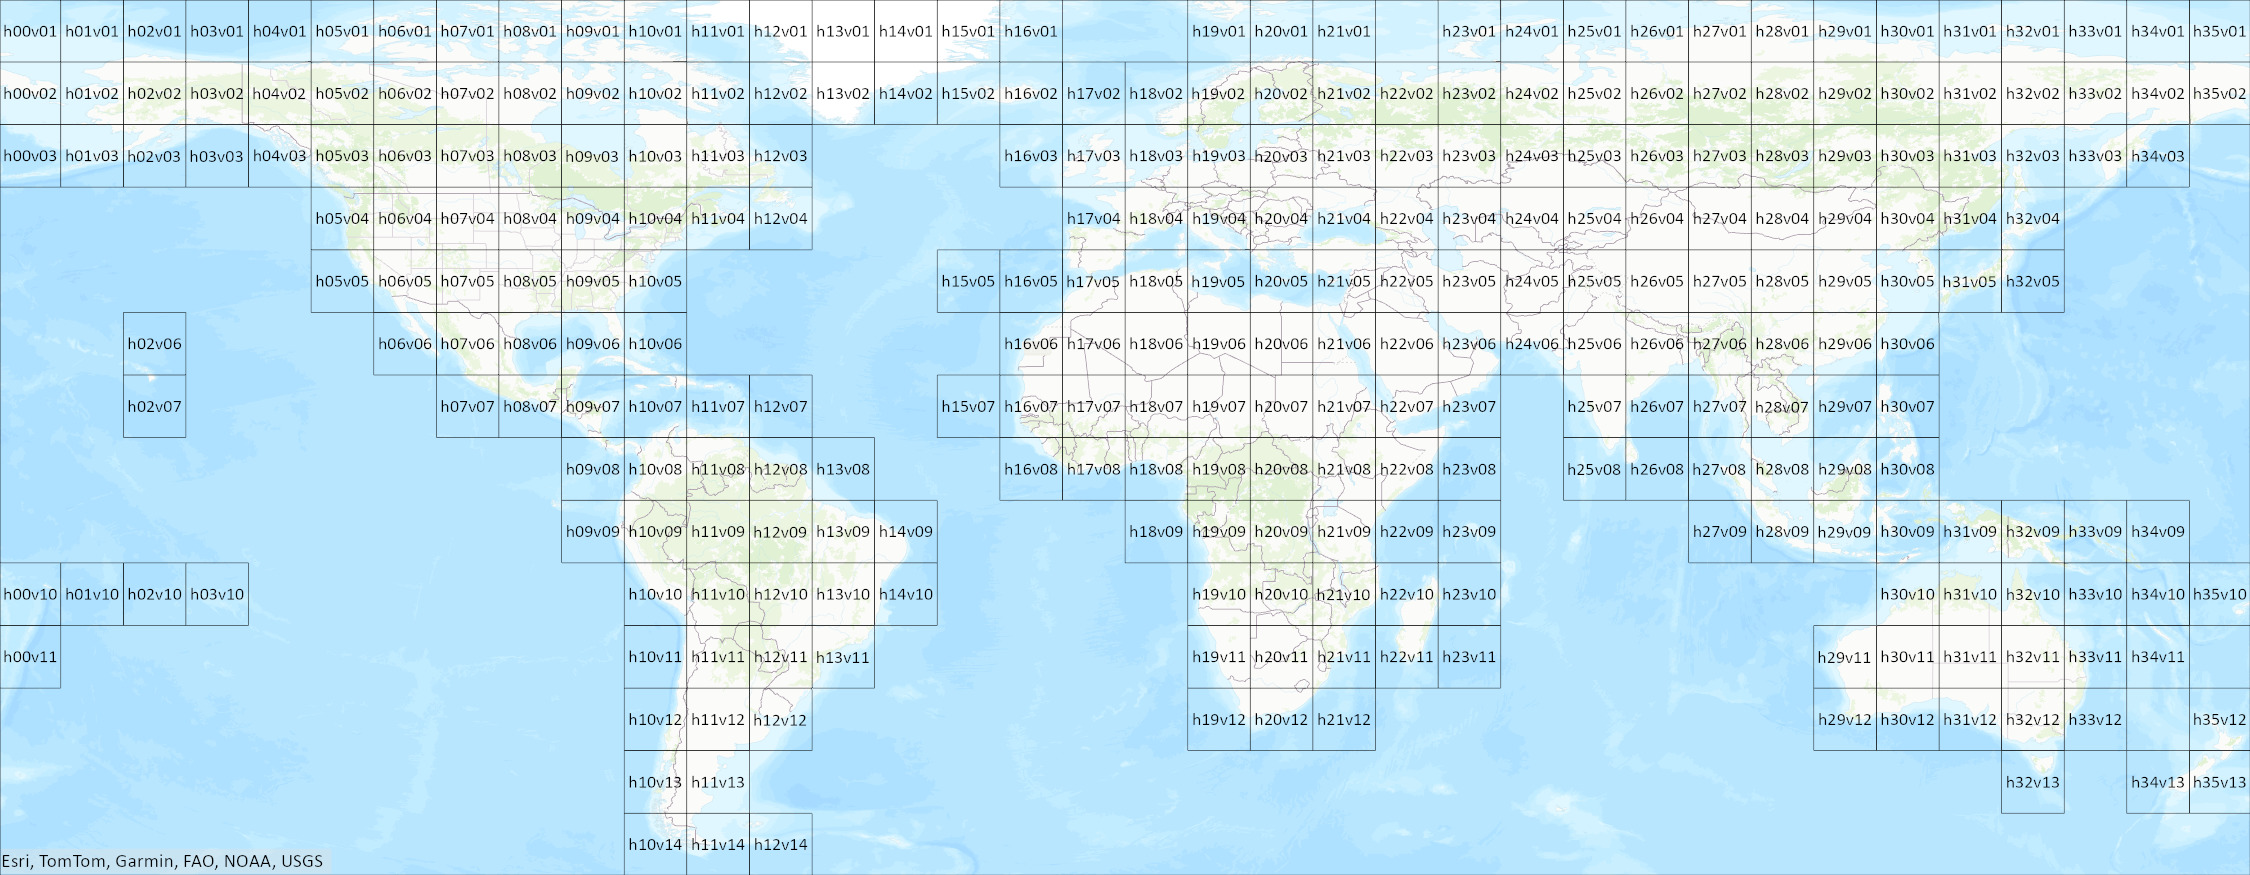

Figure 1: Flood product 10 x 10° tile scheme. LANCE MCDWD product uses the MODIS lat/lon grid h-v tile naming convention, shown in top of each tile (e.g., h09v05 for SE USA). Tiles shown are those currently in production. https://www.earthdata.nasa.gov/learn/find-data/near-real-time/modis-nrt-global-flood-product

- Step 3: Determine if you want to download the HDF5 file containing all the layers or the individual GeoTiff files
- Step 4: Determine which layer you want to download.


If your flood event occurred in the last seven days, follow the instructions under "MCDWD NRT". If your flood event occurred more than seven days ago, follow the instructions under "MCDWD Historical"

### MCDWD NRT
- Step 1: Go to the [LANCE Data Archive](https://nrt3.modaps.eosdis.nasa.gov/archive/allData/61/)
- Step 2:Determine the file format you would like to download the product as. You can either download the .hdf file containing all of the subdatasets, or download the .tif file containing one of the subdatasets
  - If you want the .hdf file, click the folder that says "MCDWD_L3_NRT"
  - If you want a .tif file:
    - If you want the 1-day product, click the folder called "MCDWD_L3_F1_NRT"
    - If you want the 1-day product with cloud shadow screening, click the folder called "MCDWD_L3_F1C_NRT"
    - If you want the 2-day product, clikc the folder called "MCDWD_L3_F2_NRT"
    - If you want the 3-day product, click the folder called "MCDWD_L3_F3_NRT"
    - Step 3: Click the folder called "2024"
    - Step 4: Click the folder with the date of year associated with your date of interest.
    - Step 5: Click the file associated with your h-v tile to download it.

### MCDWD Historical

- Step 1: Email earthdata-support@nasa.gov, and put "lance flood" in the subject line. In the body of the email, include the h-v tile, and the julian date and year for which your flood event occurs. Request the HDF file of the MCDWD product for this region and time period of interest.
- Step 2: Wait. NASA will email you the HDF files associated with the product for your date of interest.
- Step 3: Open Google Drive.
- Step 4: Create a new folder in Google Drive and give it a name
- Step 5: Upload the hdf files sent to you by NASA to the Google Drive folder you just created.
- Step 6: Run the code below.

As we saw above, we requested the files in HDF4 (Hierarchical Data Format Version 4). This is a way to store multiple geospatial files under a single file. In order to extract the subdatasets of interest, we will use the GDAL library created by OSGEO.

If you do not yet have GDAL installed to Google Colaboratory, you will have to uncomment the code below by deleting the triple quotes `'''` at the beginning **and** end of the code block below.

In [ ]:
cd ..

/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26


In [ ]:
cd MCDWD

/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26/MCDWD


In [ ]:
ls

mcdwd_01.tif  MCDWD_L3.A2024270.h19v07.061.2025016064934.hdf  merged_mcdwd_chad_09_26.tif
mcdwd_02.tif  MCDWD_L3.A2024270.h19v08.061.2025016065012.hdf
mcdwd_03.tif  MCDWD_L3.A2024270.h20v07.061.2025016064905.hdf


Let's grab one of the HDF files and use the `gdal.Info()` method to see what information is contained within a single HDF file.

In [ ]:
#dswx_hls_dir =

In [ ]:
mydir = my_Gdrive_folder + '/MCDWD'

Running the next code cell will return to us a lot of info. If we scroll down to the section that says "Subdatasets", we can see that there are 15 subdatasets. Reading the description of the subdatasets tell us which one we are after. In this case, we are after "Subdataset 1". In the description of this subdataset, we can see that it is the "FloodCS_1Day_250m..." Layer. This stands for the Flood Cloud Shadow 1 Day layer. We have elected to use the cloud shadow 1 day layer in this study, but you can see that there are other subdatasets, such as flood_1day, flood_2day, and flood_3day. The flood_1day layer is produced using the MODIS overpass just on the day of interest. The flood_2day layer is produced using the MODIS overpasses on the day of interest as well as the day before. The purpose of having these multi-day products is that by compositing over multiple days, we can hopefully find more pixels where we have a clear view of the flood.

In [ ]:
for filename in os.listdir(mydir):
  file_info = gdal.Info(filename)         # Use the gdal.Open method
  print(file_info)
  break                                   # Break the for loop so we just get the first file

Driver: HDF4/Hierarchical Data Format Release 4
Files: MCDWD_L3.A2024270.h20v07.061.2025016064905.hdf
Size is 512, 512
Metadata:
  ALGORITHMPACKAGEACCEPTANCEDATE=2019-10-09
  ALGORITHMPACKAGEMATURITYCODE=verified
  ALGORITHMPACKAGENAME=MCDFLOOD
  ALGORITHMPACKAGEVERSION=6.1.0
  ASSOCIATEDINSTRUMENTSHORTNAME.1=MODIS
  ASSOCIATEDPLATFORMSHORTNAME.1=AMPM
  ASSOCIATEDSENSORSHORTNAME.1=MODIS
  AUTOMATICQUALITYFLAG.1=Passed
  AUTOMATICQUALITYFLAGEXPLANATION.1=Always Passed.
  DAYNIGHTFLAG=Day
  DESCRREVISION=6.1.5
  EASTBOUNDINGCOORDINATE=30.000000
  EQUATORCROSSINGDATE.1=0
  EQUATORCROSSINGLONGITUDE.1=0
  EQUATORCROSSINGTIME.1=0
  EXCLUSIONGRINGFLAG=N
  GRINGPOINTLATITUDE=20, 20, 10, 10
  GRINGPOINTLONGITUDE=20, 30, 30, 20
  GRINGPOINTSEQUENCENO=1, 2, 3, 4
  HDFEOSVersion=HDFEOS_V2.20
  HORIZONTALTILENUMBER=20
  identifier_product_doi=10.5067/MODIS/MCDWD_L3.061

  identifier_product_doi_authority=http://dx.doi.org

  INPUTPOINTER=MCDWD_IHMA.A2023001.h20v07.001.img,MCDWD_IRWMA.A2023001.h20v0

Since we want subdataset 1, we will use the .getSubDatasets() method to extract the subdataset at the 0th index. **IMPORTANT: Please note that the MCDWD product changed how it orders the subdatasets. so before running the code below, please check the output of the above code cell to ensure that Subdataset_1 corresponds to the Flood_CS_1day layer. If it doesn't you will have to change the line of code below that says subdataset = gdaldataset.GetSubDatasets()[0][0]. For example, if your code says that the Flood_CS_1day layer corresponds to Subdataset_6, you will change the aforementioned line of code to say <<subdataset = gdaldataset.GetSubDatasets()[5][0]**

In [ ]:
ls

MCDWD_L3.A2024270.h19v07.061.2025016064934.hdf  MCDWD_L3.A2024270.h20v07.061.2025016064905.hdf
MCDWD_L3.A2024270.h19v08.061.2025016065012.hdf


In [ ]:
count = 0    # Set a count variable that we will use to name the output files

for filename in os.listdir(mydir):   # For each HDF file in the directory
  gdaldataset = gdal.Open(filename)                                # Open the HDF file
  subdataset = gdaldataset.GetSubDatasets()[0][0]                  # Navigate to the Subdataset of interest. In this case, we want Subdataset 1, which corresponds to the 0th index, since we start counting at 0.
  count_str = str(count + 1)                                       # Convert the counter to a string for filename purposes
  output_filename = 'mcdwd_pt' + count_str + '.tif'                # Each output file will be called 'mcdwd_pt1.tif', 'mcdwd_pt2.tif', etc.
  gdal.Translate(output_filename, subdataset)                      # use the gdal.Translate method to create tifs from subdataset_1 of each hdf file
  count += 1

In [ ]:
ls # List the files in the directory

MCDWD_L3.A2024270.h19v07.061.2025016064934.hdf  mcdwd_pt1.tif
MCDWD_L3.A2024270.h19v08.061.2025016065012.hdf  mcdwd_pt2.tif
MCDWD_L3.A2024270.h20v07.061.2025016064905.hdf  mcdwd_pt3.tif


Now, we have a .tif file containing the 1-day Cloud Shadow product for each MCDWD tile. These are called "mcdwd_pt1.tif", "mcdwd_pt2.tif", "mcdwd_pt3.tif"



In [ ]:
mcdwd_pt1 = 'mcdwd_pt1.tif'
mcdwd_pt2 = 'mcdwd_pt2.tif'
mcdwd_pt3 = 'mcdwd_pt3.tif'

gdal.Warp(mcdwd_pt1, mcdwd_pt1, dstSRS=my_projection)
gdal.Warp(mcdwd_pt2, mcdwd_pt2, dstSRS=my_projection)
gdal.Warp(mcdwd_pt3, mcdwd_pt3, dstSRS=my_projection)


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7a2722250060> >

In [ ]:
os.rename(mcdwd_pt1, 'mcdwd_01.tif')
os.rename(mcdwd_pt2, 'mcdwd_02.tif')
os.rename(mcdwd_pt3, 'mcdwd_03.tif')

In [ ]:
ls

mcdwd_01.tif  MCDWD_L3.A2024270.h19v07.061.2025016064934.hdf
mcdwd_02.tif  MCDWD_L3.A2024270.h19v08.061.2025016065012.hdf
mcdwd_03.tif  MCDWD_L3.A2024270.h20v07.061.2025016064905.hdf


In [ ]:
mcdwd_list = glob.glob("mcdwd_[0][0-9].tif")
mcdwd_cmd = "gdal_merge.py -o merged_mcdwd_chad_09_26.tif"#
subprocess.call(mcdwd_cmd.split()+mcdwd_list)

0

In [ ]:
mcdwd_list

['mcdwd_01.tif', 'mcdwd_02.tif', 'mcdwd_03.tif']

In [ ]:
ls

mcdwd_01.tif  MCDWD_L3.A2024270.h19v07.061.2025016064934.hdf  merged_mcdwd_chad_09_26.tif
mcdwd_02.tif  MCDWD_L3.A2024270.h19v08.061.2025016065012.hdf
mcdwd_03.tif  MCDWD_L3.A2024270.h20v07.061.2025016064905.hdf


In [ ]:
pwd # Print Working Directory in Google Drive

'/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26/MCDWD'

7.  Now, return to the Google Drive file above and download the .tif files to your computer as a .zip file by using ctrl_click or Shift+click.

 - Step 8: Open the [Google Earth Engine Code Editor](https://code.earthengine.google.com/)

 - Step 9: Navigate to the Assets tab. Click "New" --> "GeoTiff" --> "Select". Then navigate to the folder where you downloaded the MCDWD scene. Finally, give your asset a name such that it is in the MCDWD folder. This will be along the lines of "users/your_username/flood_intercomparison/mcdwd/asset_pt1".

 - Step 10: Repeat Step 9 for all the MCDWD scenes you downloaded.

# **VFM Product**

In [ ]:
cd

## VFM Product Visualization

VFM Visualization is only available for the most recent 14 days.

1. Go to [this website](https://floods.ssec.wisc.edu/?products=RIVER-FLDglobal-composite1.75&center=10,0&zoom=3&basemap=satellite&labels=-&timestep=1d)

2. Select your visualization parameters by clicking on the left panel.

# VFM Product Summary
### VFM Characteristics  
- Spatial Extent:
- Spatial Resolution:
- Temporal Extent
- Temporal Resolution: Daily
- Latency:
- Subproducts

### VFM Data Access

Step 1: Find your area of interest in one of the tiles below. Note the number in the center of your tile.



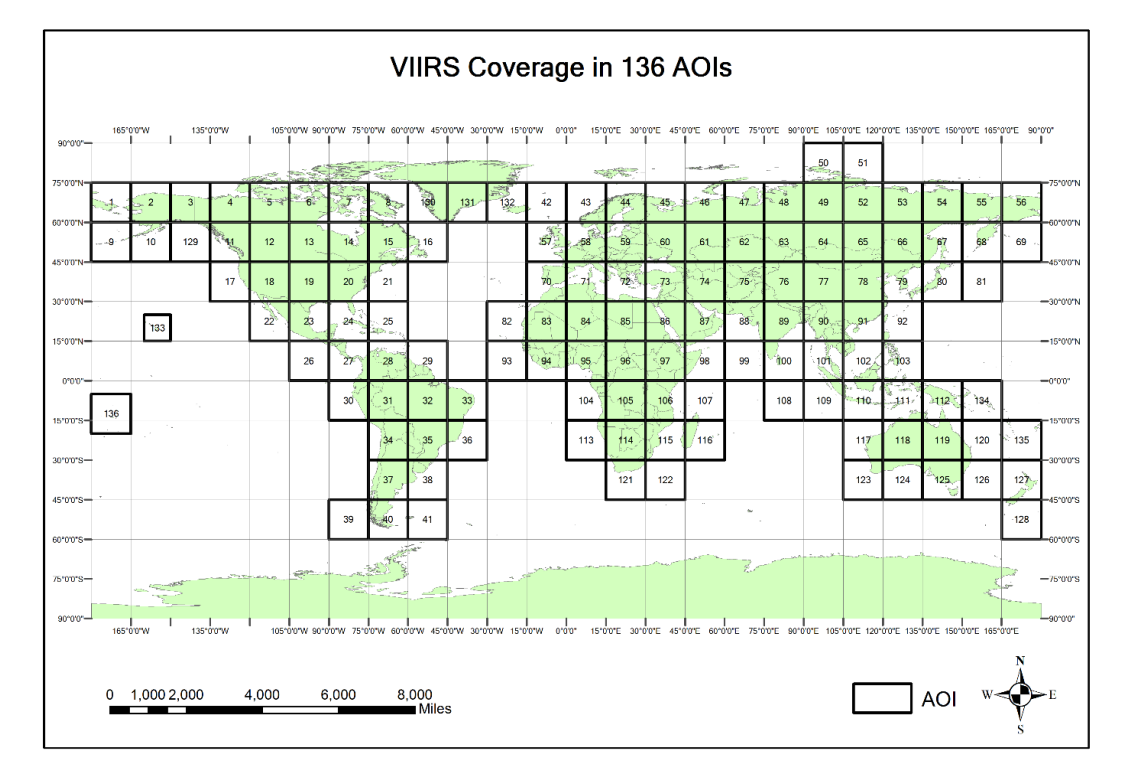



- Step 2: Click this link: https://noaa-jpss.s3.amazonaws.com/index.html#JPSS_Blended_Products/VFM_1day_GLB/
- Step 3: Click the file format you want. This workflow uses the TIF files.
- Step 4: Click the year during which your flood event occurs (Historical data is only available for certain dates)
-

### VFM Historical

Step 1: Find the aoi number corresponding to your region of interest in the following coverage map.





In [ ]:
ls

'Copy of Module_2_HydroSAR_Chad_09_26'
'Copy of Module_3_HYDRAFloods_Chad_09_26'
'Copy of Module_5_Harmonization_And_Visualization_Chad_09_26'
 dswx_hls/
 DSWX_HLS/
 dswx_s1/
 DSWX_S1/
 GFM/
 hydrosar/
 mcdwd/
 MCDWD/
 Module_1_Data_Availability_Chad_09_26
 Module_4a_Product_Access_and_reprojection_chad_09_26
 Module_4_Product_Access_chad_09_26
 Module_6a_Gridded_Sampling_Design_Chad_09_26
 Module_6_Sampling_Design_Chad_09_26
 VFM/


In [ ]:
cd ..

/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26


In [ ]:
cd VFM

/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26/VFM


In [ ]:
ls

viirs_part_1.tif  viirs_part_2.tif  viirs_part_3.tif  viirs_part_4.tif


In [ ]:
vfm_01 = 'viirs_part_1.tif'
vfm_02 = 'viirs_part_2.tif'
vfm_03 = 'viirs_part_3.tif'
vfm_04 = 'viirs_part_4.tif'

In [ ]:
#warpop = gdal.WarpOptions(srcSRS='EPSG:4326', dstSRS='EPSG:32633')
#warpop

(<osgeo.gdal.GDALWarpAppOptions; proxy of <Swig Object of type 'GDALWarpAppOptions *' at 0x79884b888ba0> >,
 None,
 None)

In [ ]:
#destination_name = 'vfm_02_reproj.tif'
#options = gdal.Warp(destination_name, vfm_02, dstSRS='EPSG:32633')

In [ ]:
gdal.Warp('vfm_01_reproj.tif', vfm_01, dstSRS = my_projection)
gdal.Warp('vfm_02_reproj.tif', vfm_02, dstSRS = my_projection)
gdal.Warp('vfm_03_reproj.tif', vfm_03, dstSRS = my_projection)
gdal.Warp('vfm_04_reproj.tif', vfm_04, dstSRS = my_projection)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7d4e9ab955f0> >

In [ ]:
vfm_list = glob.glob("vfm_[0-9][0-9]_reproj.tif")
vfm_cmd = "gdal_merge.py -o merged_vfm_chad_09_26.tif"
subprocess.call(vfm_cmd.split()+vfm_list)

0

In [ ]:
ls

merged_vfm_chad_09_26.tif  vfm_02_reproj.tif  vfm_04_reproj.tif  viirs_part_2.tif  viirs_part_4.tif
vfm_01_reproj.tif          vfm_03_reproj.tif  viirs_part_1.tif   viirs_part_3.tif


# **GFM Product**

## GFM Product Summary

The Global Flood Monitoring (GFM) product is provided by the Copernicus Emergency Management Service (CEMS) (Matgen et al 2022).

GFM uses Sentinel-1 as input data. The Sentinel-1 Mission is a part of the Space Component of Copernicus. Copernicus is a joint program of the European Space Agency (Torres et al 2017).

The Sentiel-1 SAR instrument is an active sensor that collects information in the C-band of Radio waves (Torres et al 2017). Sentinel-1 can collect data in different imaging modes that have different ground resolutions.

GFM ingests observations from the Sentinel-1 satellites that are acquired in the Interferometric Wide-swath (IW imaging mode) (Matgen et al 2022). GFM uses the Ground Range Detected at High Resolution (GRDH) product from Sentinel-1 to create the GFM Water Product (Matgen et al 2021).

GFM uses an ensemble of three different flood mapping algorithms developed by different institutions (Matgen et al 2021). A consensus decision of all algorithms based on majority voting determines if a pixel is marked as nonflood or flood. In other words, if at least two of the three algorithms classify a pixel as flood, the GFM algorithm will represent that pixel as flooded (Matgen et al 2021).

### GFM Characteristics  
- Spatial Extent: Gloabl
- Spatial Resolution: 20 meters (pixel size of 10 meters)
- Temporal Extent: January 1, 2015 - Present
- Temporal Resolution:
  - Between January 2015 and December 2021, every six days
  - between december 2021 and present, every twelve days
- Latency: ???
- Subproducts
  - Observed Flood Extent
  - Observed Water Extent
  - Exclusion Mask
  - Likelihood values
  - Advisory Flags
  - Sentinel-1 Metadata
  - Sentinel-1 Footprint
  - Affected Population
  - Affected Landcover "

## GFM Data Visualization

GFM data can be visualized on the same platform where you can download the data. Follow the instructions in the next section, "GFM Data Access & Download", in order to visualize GFM data.

## GFM Data Access & Download

Step 1: Go to https://portal.gfm.eodc.eu/

Step 2: Register or Login

You will be put at the AOI tab.

Step 3: Create the AOI

Give the AOI a name and description
(Maximum Area Allowed: 1,000,000 km^2)



Step 4: Click the products Tab
Click “Select AOI” under the Area of Interest Tab. Select the AOI you just created.

Step 5: Click the start date and end date you want
Note: You may have to pick a wide date range  because GFM relies on Sentinel-1 data, which has a temporal revisit time of 12 days

Step 6: Click the dropdown arrow next to the footprints you want to download.

Step 7: Click the layer you are interested in downloading

Step 8: Click the “Download Layers” Button


In [ ]:
cd ..

/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26


In [ ]:
cd GFM

/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26/GFM


In [ ]:
ls

AF_E051N057T3_ENSEMBLE_OBSWATER_20240926T043148_VV_AF020M_E051N057T3_20240926.tif
AF_E051N057T3_ENSEMBLE_OBSWATER_20240926T043213_VV_AF020M_E051N057T3_20240926.tif
AF_E051N060T3_ENSEMBLE_OBSWATER_20240926T043123_VV_AF020M_E051N060T3_20240926.tif
AF_E051N060T3_ENSEMBLE_OBSWATER_20240926T043148_VV_AF020M_E051N060T3_20240926.tif
AF_E051N060T3_ENSEMBLE_OBSWATER_20240926T043213_VV_AF020M_E051N060T3_20240926.tif
AF_E051N063T3_ENSEMBLE_OBSWATER_20240926T043029_VV_AF020M_E051N063T3_20240926.tif
AF_E051N063T3_ENSEMBLE_OBSWATER_20240926T043058_VV_AF020M_E051N063T3_20240926.tif
AF_E051N063T3_ENSEMBLE_OBSWATER_20240926T043123_VV_AF020M_E051N063T3_20240926.tif
AF_E051N066T3_ENSEMBLE_OBSWATER_20240926T043029_VV_AF020M_E051N066T3_20240926.tif
AF_E054N057T3_ENSEMBLE_OBSWATER_20240926T043148_VV_AF020M_E054N057T3_20240926.tif
AF_E054N057T3_ENSEMBLE_OBSWATER_20240926T043213_VV_AF020M_E054N057T3_20240926.tif
AF_E054N060T3_ENSEMBLE_OBSWATER_20240926T043123_VV_AF020M_E054N060T3_20240926.tif
AF_E054N060T3_EN

In [ ]:
infooo = gdal.Info('AF_E051N057T3_ENSEMBLE_OBSWATER_20240926T043213_VV_AF020M_E051N057T3_20240926.tif')
info2 = gdal.Info('AF_E051N060T3_ENSEMBLE_OBSWATER_20240926T043213_VV_AF020M_E051N060T3_20240926.tif')
info3 = gdal.Info('AF_E051N060T3_ENSEMBLE_OBSWATER_20240926T043148_VV_AF020M_E051N060T3_20240926.tif')
print(info3)

Driver: GTiff/GeoTIFF
Files: AF_E051N060T3_ENSEMBLE_OBSWATER_20240926T043148_VV_AF020M_E051N060T3_20240926.tif
Size is 8929, 10026
Coordinate System is:
GEOGCRS["WGS 84",
    ENSEMBLE["World Geodetic System 1984 ensemble",
        MEMBER["World Geodetic System 1984 (Transit)"],
        MEMBER["World Geodetic System 1984 (G730)"],
        MEMBER["World Geodetic System 1984 (G873)"],
        MEMBER["World Geodetic System 1984 (G1150)"],
        MEMBER["World Geodetic System 1984 (G1674)"],
        MEMBER["World Geodetic System 1984 (G1762)"],
        MEMBER["World Geodetic System 1984 (G2139)"],
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]],
        ENSEMBLEACCURACY[2.0]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDE

In [ ]:
gdal.Warp('test_reproj.tif', 'AF_E051N060T3_ENSEMBLE_OBSWATER_20240926T043213_VV_AF020M_E051N060T3_20240926.tif', dstSRS=my_projection)
gdal.Warp('test_reproj_v2.tif', 'AF_E051N060T3_ENSEMBLE_OBSWATER_20240926T043148_VV_AF020M_E051N060T3_20240926.tif', dstSRS=my_projection)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x78b4a6f92f70> >

In [ ]:
ls

AF_E051N057T3_ENSEMBLE_OBSWATER_20240926T043148_VV_AF020M_E051N057T3_20240926.tif
AF_E051N057T3_ENSEMBLE_OBSWATER_20240926T043213_VV_AF020M_E051N057T3_20240926.tif
AF_E051N060T3_ENSEMBLE_OBSWATER_20240926T043123_VV_AF020M_E051N060T3_20240926.tif
AF_E051N060T3_ENSEMBLE_OBSWATER_20240926T043148_VV_AF020M_E051N060T3_20240926.tif
AF_E051N060T3_ENSEMBLE_OBSWATER_20240926T043213_VV_AF020M_E051N060T3_20240926.tif


In [ ]:
cd ..

/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26


In [ ]:
cd GFM

/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26/GFM


In [ ]:
gfm_01 = 'AF_E051N057T3_ENSEMBLE_OBSWATER_20240926T043148_VV_AF020M_E051N057T3_20240926.tif'
gfm_02 = 'AF_E051N057T3_ENSEMBLE_OBSWATER_20240926T043213_VV_AF020M_E051N057T3_20240926.tif'
gfm_03 = 'AF_E051N060T3_ENSEMBLE_OBSWATER_20240926T043123_VV_AF020M_E051N060T3_20240926.tif'
gfm_04 = 'AF_E051N060T3_ENSEMBLE_OBSWATER_20240926T043148_VV_AF020M_E051N060T3_20240926.tif'
gfm_05 = 'AF_E051N060T3_ENSEMBLE_OBSWATER_20240926T043213_VV_AF020M_E051N060T3_20240926.tif'
gfm_06 = 'AF_E051N063T3_ENSEMBLE_OBSWATER_20240926T043029_VV_AF020M_E051N063T3_20240926.tif'
gfm_07 = 'AF_E051N063T3_ENSEMBLE_OBSWATER_20240926T043058_VV_AF020M_E051N063T3_20240926.tif'
gfm_08 = 'AF_E051N063T3_ENSEMBLE_OBSWATER_20240926T043123_VV_AF020M_E051N063T3_20240926.tif'
gfm_09 = 'AF_E051N066T3_ENSEMBLE_OBSWATER_20240926T043029_VV_AF020M_E051N066T3_20240926.tif'
gfm_10 = 'AF_E054N057T3_ENSEMBLE_OBSWATER_20240926T043148_VV_AF020M_E054N057T3_20240926.tif'
gfm_11 = 'AF_E054N057T3_ENSEMBLE_OBSWATER_20240926T043213_VV_AF020M_E054N057T3_20240926.tif'
gfm_12 = 'AF_E054N060T3_ENSEMBLE_OBSWATER_20240926T043123_VV_AF020M_E054N060T3_20240926.tif'
gfm_13 = 'AF_E054N060T3_ENSEMBLE_OBSWATER_20240926T043148_VV_AF020M_E054N060T3_20240926.tif'
gfm_14 = 'AF_E054N063T3_ENSEMBLE_OBSWATER_20240926T043029_VV_AF020M_E054N063T3_20240926.tif'
gfm_15 = 'AF_E054N063T3_ENSEMBLE_OBSWATER_20240926T043058_VV_AF020M_E054N063T3_20240926.tif'
gfm_16 = 'AF_E054N063T3_ENSEMBLE_OBSWATER_20240926T043123_VV_AF020M_E054N063T3_20240926.tif'
gfm_17 = 'AF_E054N066T3_ENSEMBLE_OBSWATER_20240926T043029_VV_AF020M_E054N066T3_20240926.tif'

In [ ]:
os.rename(gfm_01, 'gfm_01.tif')
os.rename(gfm_02, 'gfm_02.tif')
os.rename(gfm_03, 'gfm_03.tif')
os.rename(gfm_04, 'gfm_04.tif')
os.rename(gfm_05, 'gfm_05.tif')
os.rename(gfm_06, 'gfm_06.tif')
os.rename(gfm_07, 'gfm_07.tif')
os.rename(gfm_08, 'gfm_08.tif')
os.rename(gfm_09, 'gfm_09.tif')
os.rename(gfm_10, 'gfm_10.tif')
os.rename(gfm_11, 'gfm_11.tif')
os.rename(gfm_12, 'gfm_12.tif')
os.rename(gfm_13, 'gfm_13.tif')
os.rename(gfm_14, 'gfm_14.tif')
os.rename(gfm_15, 'gfm_15.tif')
os.rename(gfm_16, 'gfm_16.tif')
os.rename(gfm_17, 'gfm_17.tif')

In [ ]:
gdal.Warp('gfm_01_reproj.tif', gfm_01, srcSRS = 'EPSG:27701', dstSRS=my_projection)

TypeError: object of wrong GDALDatasetShadow

In [ ]:
gdal.Warp('gfm_01_reproj.tif', 'gfm_01.tif', dstSRS=my_projection)
gdal.Warp('gfm_02_reproj.tif', 'gfm_02.tif', dstSRS=my_projection)
gdal.Warp('gfm_03_reproj.tif', 'gfm_03.tif', dstSRS=my_projection)
gdal.Warp('gfm_04_reproj.tif', 'gfm_04.tif', dstSRS=my_projection)
gdal.Warp('gfm_05_reproj.tif', 'gfm_05.tif', dstSRS=my_projection)
gdal.Warp('gfm_06_reproj.tif', 'gfm_06.tif', dstSRS=my_projection)
gdal.Warp('gfm_07_reproj.tif', 'gfm_07.tif', dstSRS=my_projection)
gdal.Warp('gfm_08_reproj.tif', 'gfm_08.tif', dstSRS=my_projection)
gdal.Warp('gfm_09_reproj.tif', 'gfm_09.tif', dstSRS=my_projection)
gdal.Warp('gfm_10_reproj.tif', 'gfm_10.tif', dstSRS=my_projection)
gdal.Warp('gfm_11_reproj.tif', 'gfm_11.tif', dstSRS=my_projection)
gdal.Warp('gfm_12_reproj.tif', 'gfm_12.tif', dstSRS=my_projection)
gdal.Warp('gfm_13_reproj.tif', 'gfm_13.tif', dstSRS=my_projection)
gdal.Warp('gfm_14_reproj.tif', 'gfm_14.tif', dstSRS=my_projection)
gdal.Warp('gfm_15_reproj.tif', 'gfm_15.tif', dstSRS=my_projection)
gdal.Warp('gfm_16_reproj.tif', 'gfm_16.tif', dstSRS=my_projection)
gdal.Warp('gfm_17_reproj.tif', 'gfm_17.tif', dstSRS=my_projection)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x78b4f01995f0> >

In [ ]:
gfm_list = glob.glob("gfm_[0-9][0-9]_reproj.tif")
gfm_cmd = "gdal_merge.py -o merged_gfm_chad_09_26.tif"
subprocess.call(gfm_cmd.split()+gfm_list)

0

## Part X: HYDROSAR

In [ ]:
cd ..

/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26


In [ ]:
cd hydrosar

/content/drive/MyDrive/Flood_Intercomparison/Case_Studies/confirmed_case_studies/chad_09_26/hydrosar


In [ ]:
ls

S1A_IW_20240926T043058_DVP_RTC30_G_gpufed_9205/     water_extent_beta_VV_initial.tif
S1A_IW_20240926T043058_DVP_RTC30_G_gpufed_9205.zip  water_extent_gamma_HAND.tif
S1A_IW_20240926T043123_DVP_RTC30_G_gpufed_678E/     water_extent_gamma_VH_fuzzy.tif
S1A_IW_20240926T043123_DVP_RTC30_G_gpufed_678E.zip  water_extent_gamma_VH_initial.tif
S1A_IW_20240926T043148_DVP_RTC30_G_gpufed_7D0A/     water_extent_gamma_VV_fuzzy.tif
S1A_IW_20240926T043148_DVP_RTC30_G_gpufed_7D0A.zip  water_extent_gamma_VV_initial.tif
S1A_IW_20240926T043148_DVP_RTC30_G_gpufed_AF48/     water_extent_pt1.tif
S1A_IW_20240926T043148_DVP_RTC30_G_gpufed_AF48.zip  water_extent_pt2.tif
S1A_IW_20240926T043213_DVP_RTC30_G_gpufed_25E1/     water_extent_pt3.tif
S1A_IW_20240926T043213_DVP_RTC30_G_gpufed_25E1.zip  water_extent_pt4_HAND.tif
S1A_IW_20240926T043238_DVP_RTC30_G_gpufed_4069/     water_extent_pt4.tif
S1A_IW_20240926T043238_DVP_RTC30_G_gpufed_4069.zip  water_extent_pt4_VH_fuzzy.tif
water_extent_alpha_HAND.tif                

In [ ]:
hydrosar_list = glob.glob("water_extent_pt[0-9].tif")
for file in hydrosar_list:
  index_num = file[-5]
  # Rename file
  output_file = 'hydrosar_pt'+index_num + '.tif'

  # Warp dataset
  gdal.Warp(output_file, file, dstSRS=my_projection)

In [ ]:
ls

hydrosar_pt1.tif                                    water_extent_beta_VH_initial.tif
hydrosar_pt2.tif                                    water_extent_beta_VV_fuzzy.tif
hydrosar_pt3.tif                                    water_extent_beta_VV_initial.tif
hydrosar_pt4.tif                                    water_extent_gamma_HAND.tif
hydrosar_pt5.tif                                    water_extent_gamma_VH_fuzzy.tif
S1A_IW_20240926T043058_DVP_RTC30_G_gpufed_9205/     water_extent_gamma_VH_initial.tif
S1A_IW_20240926T043058_DVP_RTC30_G_gpufed_9205.zip  water_extent_gamma_VV_fuzzy.tif
S1A_IW_20240926T043123_DVP_RTC30_G_gpufed_678E/     water_extent_gamma_VV_initial.tif
S1A_IW_20240926T043123_DVP_RTC30_G_gpufed_678E.zip  water_extent_pt1.tif
S1A_IW_20240926T043148_DVP_RTC30_G_gpufed_7D0A/     water_extent_pt2.tif
S1A_IW_20240926T043148_DVP_RTC30_G_gpufed_7D0A.zip  water_extent_pt3.tif
S1A_IW_20240926T043148_DVP_RTC30_G_gpufed_AF48/     water_extent_pt4_HAND.tif
S1A_IW_20240926T043148_DVP_RTC

In [ ]:
hydrosar_list_2 = glob.glob("hydrosar_pt[0-9].tif")
hydrosar_cmd = "gdal_merge.py -o merged_hydrosar_chad_09_26.tif"
subprocess.call(hydrosar_cmd.split()+hydrosar_list_2)

0

In [ ]:
ls

hydrosar_pt1.tif                                    water_extent_beta_VH_fuzzy.tif
hydrosar_pt2.tif                                    water_extent_beta_VH_initial.tif
hydrosar_pt3.tif                                    water_extent_beta_VV_fuzzy.tif
hydrosar_pt4.tif                                    water_extent_beta_VV_initial.tif
hydrosar_pt5.tif                                    water_extent_gamma_HAND.tif
merged_hydrosar_chad_09_26.tif                      water_extent_gamma_VH_fuzzy.tif
S1A_IW_20240926T043058_DVP_RTC30_G_gpufed_9205/     water_extent_gamma_VH_initial.tif
S1A_IW_20240926T043058_DVP_RTC30_G_gpufed_9205.zip  water_extent_gamma_VV_fuzzy.tif
S1A_IW_20240926T043123_DVP_RTC30_G_gpufed_678E/     water_extent_gamma_VV_initial.tif
S1A_IW_20240926T043123_DVP_RTC30_G_gpufed_678E.zip  water_extent_pt1.tif
S1A_IW_20240926T043148_DVP_RTC30_G_gpufed_7D0A/     water_extent_pt2.tif
S1A_IW_20240926T043148_DVP_RTC30_G_gpufed_7D0A.zip  water_extent_pt3.tif
S1A_IW_20240926T043148_DV

### **IMPORTANT: Before proceeding to the next module, upload all the GeoTiff files to Google Earth Engine.**

# **References**

- Barnes, William L., Xiaoxiong Xiong, and Vincent V. Salomonson. "Status of terra MODIS and aqua MODIS." Advances in Space Research 32.11 (2003): 2099-2106.
- Li, Sanmei, et al. "Automatic near real-time flood detection using Suomi-NPP/VIIRS data." Remote sensing of environment 204 (2018): 672-689.
- Matgen, Patrick. "Provision of an Automated, Global, Satellite-based Flood Monitoring Product for the Copernicus Emergency Management Service. "GFM D6 Product Definition Document. Issue 1 Version 1.4. April 20, 2022.
- NRT MODIS/Aqua+Terra Global Flood Product MCDWD_L3_NRT distributed from NASA LANCE. Available on-line [https://www.earthdata.nasa.gov/global-flood-product]. DOI: 10.5067/MODIS/MCDWD_L3_NRT.061
- 	OPERA . 2023. OPERA Dynamic Surface Water Extent from Harmonized Landsat Sentinel-2 (Version 1). Ver. 1.0. PO.DAAC, CA, USA. Dataset accessed at https://doi.org/10.5067/OPDSW-PL3V1
- Slayback, Dan. "MODIS NRT Global Flood Product User Guide". NASA Land Atmosphere Near real-time Capability for Eartg Observing Systens. Revision D. [https://www.earthdata.nasa.gov/s3fs-public/2024-04/MCDWD_UserGuide_RevD.pdf](https://www.earthdata.nasa.gov/s3fs-public/2024-04/MCDWD_UserGuide_RevD.pdf)
- Torres, Ramon, et al, "Sentinel-1 SAR system and mission," 2017 IEEE Radar Conference (RadarConf), Seattle, WA, USA, 2017, pp. 1582-1585, doi: 10.1109/RADAR.2017.7944460. keywords: {Doppler effect;Synthetic aperture radar;Azimuth;Instruments;Extraterrestrial measurements;Antenna measurements;Synchronization;Sentinel-1;SAR performance;TOPS;InSAR},

